In [1]:
import tensorflow as tf

2023-05-05 16:34:04.216341: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# other imports
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D


In [4]:
#synthetic dataset creation 
N = 1000
X = np.random.random((N, 2)) * 6 - 3 #uniformly distributed between (-3, +3) random is usually between (-1, 1) thats why we multiply
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

This implemetns the function:
y = cos(2 x1) + cos(3 x2)

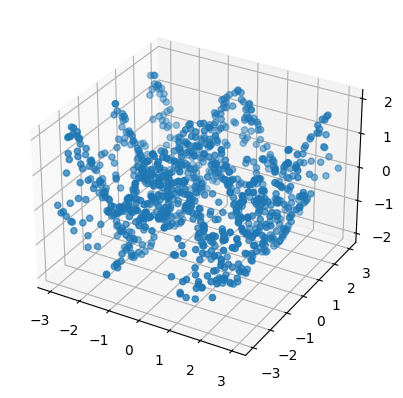

In [7]:
#plotting the set
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y) 

In [11]:
#build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [13]:
#compile and fit
opt = tf.keras.optimizers.Adam(0.01) #because we want a different learning rate
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.9839
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9213
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9005
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8687
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8658
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7951
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7312
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6845
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6392
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5954
Epoch 11/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5354
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6006
Epoch 13/100
32/32 [=================

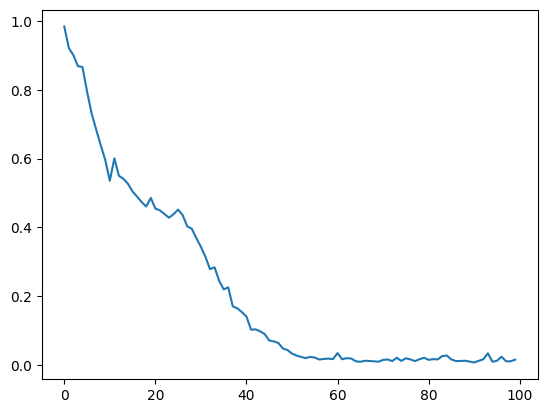

In [14]:
#plot the loss
plt.plot(r.history['loss'], label = 'loss')

79/79 [==============================] - 0s 2ms/step


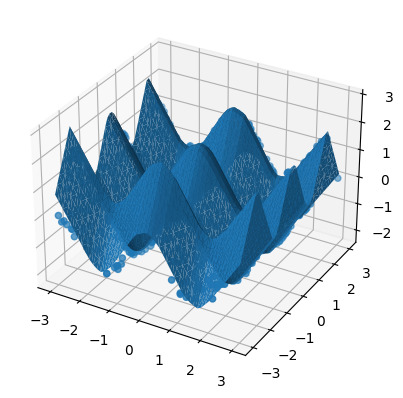

In [16]:
#plot prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T 
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 3ms/step


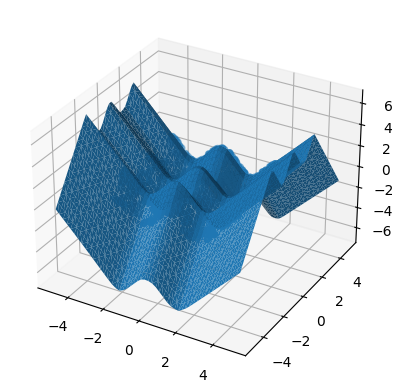

In [20]:
#can it extrapolate 
#plot the prediction surface 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:, 1], Y)

#surface plots

line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T 
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth = .2, antialiased=True)
plt.show()